In [2]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
import numpy as np
%pylab inline
import nltk
from nltk import bigrams
from nltk import word_tokenize
from nltk import punkt
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import re


Populating the interactive namespace from numpy and matplotlib


In [3]:
salary_data = pd.read_csv("Train_rev1.csv")

In [4]:
jobdescriptions = salary_data["FullDescription"][0:1000]
jobdescriptions = jobdescriptions.str.decode("utf-8")
clean_jobdescriptions = []
for desc in jobdescriptions:
    clean_jobdescriptions.append(desc)
clean_jobdescriptions2 = " ".join(clean_jobdescriptions)

In [5]:
tokens = nltk.word_tokenize(clean_jobdescriptions2)

In [6]:
tokens

[u'Engineering',
 u'Systems',
 u'Analyst',
 u'Dorking',
 u'Surrey',
 u'Salary',
 u'****K',
 u'Our',
 u'client',
 u'is',
 u'located',
 u'in',
 u'Dorking',
 u',',
 u'Surrey',
 u'and',
 u'are',
 u'looking',
 u'for',
 u'Engineering',
 u'Systems',
 u'Analyst',
 u'our',
 u'client',
 u'provides',
 u'specialist',
 u'software',
 u'development',
 u'Keywords',
 u'Mathematical',
 u'Modelling',
 u',',
 u'Risk',
 u'Analysis',
 u',',
 u'System',
 u'Modelling',
 u',',
 u'Optimisation',
 u',',
 u'MISER',
 u',',
 u'PIONEEER',
 u'Engineering',
 u'Systems',
 u'Analyst',
 u'Dorking',
 u'Surrey',
 u'Salary',
 u'****K',
 u'Stress',
 u'Engineer',
 u'Glasgow',
 u'Salary',
 u'****',
 u'to',
 u'****',
 u'We',
 u're',
 u'currently',
 u'looking',
 u'for',
 u'talented',
 u'engineers',
 u'to',
 u'join',
 u'our',
 u'growing',
 u'Glasgow',
 u'team',
 u'at',
 u'a',
 u'variety',
 u'of',
 u'levels',
 u'.',
 u'The',
 u'roles',
 u'are',
 u'ideally',
 u'suited',
 u'to',
 u'high',
 u'calibre',
 u'engineering',
 u'graduates',

In [7]:
pos_tags = nltk.pos_tag(tokens)

In [8]:
pos_list = [tag[1] for tag in pos_tags]

In [9]:
pos_list

['VBG',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'PRP$',
 'NN',
 'VBZ',
 'VBN',
 'IN',
 'NNP',
 ',',
 'NNP',
 'CC',
 'VBP',
 'VBG',
 'IN',
 'VBG',
 'NNP',
 'NNP',
 'PRP$',
 'NN',
 'VBZ',
 'JJ',
 'NN',
 'NN',
 'NNP',
 'NNP',
 'NNP',
 ',',
 'NNP',
 'NNP',
 ',',
 'NNP',
 'NNP',
 ',',
 'NNP',
 ',',
 'NNP',
 ',',
 'NNP',
 'NNP',
 'NNPS',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'TO',
 'VB',
 'PRP',
 'VBP',
 'RB',
 'VBG',
 'IN',
 'JJ',
 'NNS',
 'TO',
 'VB',
 'PRP$',
 'VBG',
 'NNP',
 'NN',
 'IN',
 'DT',
 'NN',
 'IN',
 'NNS',
 '.',
 'DT',
 'NNS',
 'VBP',
 'RB',
 'VBN',
 'TO',
 'JJ',
 'NN',
 'NN',
 'NNS',
 'IN',
 'DT',
 'NN',
 'IN',
 'JJ',
 'NN',
 ',',
 'IN',
 'IN',
 'PRP',
 'MD',
 'VB',
 'PRP',
 'DT',
 'NN',
 'TO',
 'VB',
 'PRP$',
 'JJ',
 'NNS',
 'TO',
 'VB',
 'JJ',
 'NN',
 'NN',
 'TO',
 'PRP$',
 'NN',
 'NNS',
 ',',
 'VBG',
 'DT',
 'NNS',
 'CC',
 'NNS',
 '.',
 'IN',
 'NN',
 ',',
 'PRP',
 'MD',
 'VB',
 'JJ',
 'NN',
 'NNS',
 'CC',
 'DT',
 'NN',
 'I

In [10]:
Series(pos_list).value_counts()[:5]

NN     35686
NNP    30762
IN     22677
JJ     18051
DT     16998
dtype: int64

# A2

In [11]:
words = [word[0].lower() for word in pos_tags]
words = Series(words)

In [12]:
words

0          engineering
1              systems
2              analyst
3              dorking
4               surrey
5               salary
6                ****k
7                  our
8               client
9                   is
10             located
11                  in
12             dorking
13                   ,
14              surrey
15                 and
16                 are
17             looking
18                 for
19         engineering
20             systems
21             analyst
22                 our
23              client
24            provides
25          specialist
26            software
27         development
28            keywords
29        mathematical
              ...     
221910              is
221911              on
221912           offer
221913               .
221914      applicants
221915            must
221916            hold
221917               a
221918         current
221919             nmc
221920             pin
221921             and
221922     

In [13]:
mask = [word.isalpha() for word in words]

In [14]:
mask

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True

In [15]:
cleanwords = words[mask]

In [16]:
cleanwords

0          engineering
1              systems
2              analyst
3              dorking
4               surrey
5               salary
7                  our
8               client
9                   is
10             located
11                  in
12             dorking
14              surrey
15                 and
16                 are
17             looking
18                 for
19         engineering
20             systems
21             analyst
22                 our
23              client
24            provides
25          specialist
26            software
27         development
28            keywords
29        mathematical
30           modelling
32                risk
              ...     
221907       excellent
221908    remuneration
221909         package
221910              is
221911              on
221912           offer
221914      applicants
221915            must
221916            hold
221917               a
221918         current
221919             nmc
221920     

In [17]:
frequencies = list(cleanwords.value_counts()[:100])
frequencies

[8435,
 7121,
 6677,
 5812,
 4547,
 4229,
 3450,
 3033,
 2652,
 2469,
 2373,
 2216,
 2085,
 2043,
 1793,
 1492,
 1406,
 1361,
 1350,
 1346,
 1329,
 1196,
 1187,
 1180,
 1093,
 1088,
 1070,
 1040,
 976,
 965,
 893,
 860,
 832,
 823,
 779,
 762,
 761,
 738,
 691,
 670,
 650,
 634,
 612,
 599,
 594,
 587,
 562,
 559,
 533,
 531,
 523,
 502,
 501,
 484,
 480,
 474,
 461,
 448,
 445,
 439,
 438,
 432,
 422,
 418,
 401,
 397,
 396,
 390,
 382,
 378,
 376,
 364,
 362,
 347,
 335,
 335,
 332,
 331,
 330,
 329,
 328,
 324,
 324,
 323,
 315,
 315,
 313,
 312,
 309,
 307,
 304,
 299,
 296,
 293,
 293,
 292,
 290,
 288,
 287,
 287]

In [18]:
ranks = [rank+1 for rank in range(100)]
ranks


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

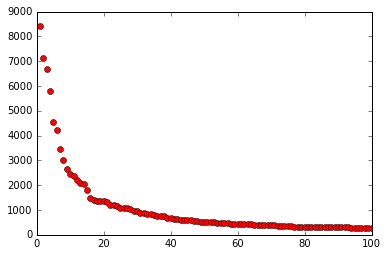

In [19]:
plt.plot(ranks, frequencies, 'ro', color="red")

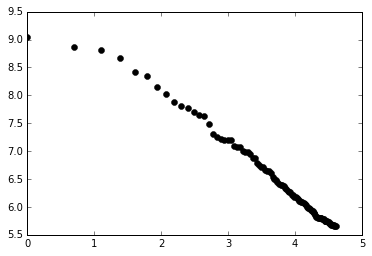

In [20]:
plt.plot([math.log(rank) for rank in ranks], [math.log(freq) for freq in frequencies], 'ro', color="black")

# A3

In [24]:
nostop = [w for w in cleanwords if not w in stopwords.words('english')]

In [25]:
lemmatizer = WordNetLemmatizer()
nostoplemmatized = [lemmatizer.lemmatize(w) for w in nostop]

In [30]:
nostoplemmatized = Series(nostoplemmatized)

In [31]:
nostoplemmatized

0          engineering
1               system
2              analyst
3              dorking
4               surrey
5               salary
6               client
7              located
8              dorking
9               surrey
10             looking
11         engineering
12              system
13             analyst
14              client
15            provides
16          specialist
17            software
18         development
19            keywords
20        mathematical
21           modelling
22                risk
23            analysis
24              system
25           modelling
26        optimisation
27               miser
28            pioneeer
29         engineering
              ...     
121553            home
121554         setting
121555      additional
121556     information
121557            hour
121558            post
121559      negotiable
121560         maximum
121561             per
121562            week
121563       depending
121564     requirement
121565     

In [33]:
nostoplemmatized.value_counts()[:10]

care          3060
home          2117
experience    1366
manager       1276
nurse         1266
work          1201
nursing       1180
support       1093
within        1040
working        965
dtype: int64